<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/content/t.csv')
df

,month,spi1,sl1,avg R.HUM,avg temp
0,01-05-1980,-1.469306,-1.469306,0.856281,22.978145
1,01-06-1980,0.364798,-1.469306,0.942733,23.261097
2,01-07-1980,0.606144,0.364798,0.903878,24.600967
3,01-08-1980,0.606144,0.606144,0.882303,24.909726
4,01-09-1980,1.001410,0.606144,0.833859,23.641217
...,...,...,...,...,...
404,01-01-2014,0.317544,0.143235,0.682444,27.362823
405,01-02-2014,0.546507,0.317544,0.783198,23.614450
406,01-03-2014,0.629004,0.546507,0.946414,23.285097
407,01-04-2014,0.174373,0.629004,0.959161,24.194050


In [29]:
 df['date_time'] = pd.to_datetime(df['month'], infer_datetime_format=True)
df

,month,spi1,sl1,avg R.HUM,avg temp,date_time
0,01-05-1980,-1.469306,-1.469306,0.856281,22.978145,1980-01-05
1,01-06-1980,0.364798,-1.469306,0.942733,23.261097,1980-01-06
2,01-07-1980,0.606144,0.364798,0.903878,24.600967,1980-01-07
3,01-08-1980,0.606144,0.606144,0.882303,24.909726,1980-01-08
4,01-09-1980,1.001410,0.606144,0.833859,23.641217,1980-01-09
...,...,...,...,...,...,...
404,01-01-2014,0.317544,0.143235,0.682444,27.362823,2014-01-01
405,01-02-2014,0.546507,0.317544,0.783198,23.614450,2014-01-02
406,01-03-2014,0.629004,0.546507,0.946414,23.285097,2014-01-03
407,01-04-2014,0.174373,0.629004,0.959161,24.194050,2014-01-04


In [30]:
 df.index = pd.to_datetime(df['date_time'], format='%d.%m.%Y')
 df = df.drop(columns = ['month','date_time'])
 df

,spi1,sl1,avg R.HUM,avg temp
date_time,,,,
1980-01-05,-1.469306,-1.469306,0.856281,22.978145
1980-01-06,0.364798,-1.469306,0.942733,23.261097
1980-01-07,0.606144,0.364798,0.903878,24.600967
1980-01-08,0.606144,0.606144,0.882303,24.909726
1980-01-09,1.001410,0.606144,0.833859,23.641217
...,...,...,...,...
2014-01-01,0.317544,0.143235,0.682444,27.362823
2014-01-02,0.546507,0.317544,0.783198,23.614450
2014-01-03,0.629004,0.546507,0.946414,23.285097


In [145]:
def df_to_X_y2(df, window_size=4):
  df_as_np = df.to_numpy()
  X = []
  y = []
  print((df_as_np))
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [146]:
X, y = df_to_X_y2(df)
print(y)

[[-1.46930632 -1.46930632  0.85628087 22.97814516]
 [ 0.36479832 -1.46930632  0.94273307 23.26109677]
 [ 0.606144    0.36479832  0.90387785 24.60096667]
 ...
 [ 0.62900372  0.54650681  0.94641374 23.28509677]
 [ 0.17437274  0.62900372  0.95916114 24.19405   ]
 [ 1.14431821  0.17437274  0.89229582 23.88896774]]
[ 1.00140985  2.14577843  1.70155793  0.69433599 -0.39145685 -2.15697321
 -0.8088444  -1.28979827 -0.03470558  1.70155793  0.          0.69433599
  0.78829543  1.1271452   1.00140985  0.44224165 -2.15697321 -1.71481725
 -1.71481725 -1.71481725 -2.15697321  0.52243608 -0.2894859   1.00140985
 -0.88979437  0.69433599  1.4545789  -0.07143395 -0.8088444  -1.28979827
 -2.15697321 -2.15697321 -0.90922065 -0.606144    0.07143395  2.14577843
 -0.2894859   0.606144    0.78829543  1.70155793  1.71481725  0.71602545
 -0.62900372 -1.14431821 -0.31754439 -0.69433599 -1.4545789  -0.52243608
  0.07143395  0.21578265 -0.606144    1.27380231 -0.71602545 -0.24532919
 -0.39145685 -0.71602545  0.909

In [160]:
X_train, y_train = X[:155], y[:155]
X_val, y_val = X[155:310], y[155:310]
X_test, y_test = X[310:], y[310:]
print(y_test)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

[ 1.41646537  1.09342739 -0.23147203 -0.89643534 -1.6973012  -0.30418584
 -0.05282588  1.6732101   0.44271166  1.6732101   0.98744141  0.19429962
 -0.08906117  0.75912658 -1.27528808 -0.23147203 -0.15989807  1.09342739
  2.10943024 -0.63914573 -0.26062192 -0.12147079 -0.26062192 -0.23147203
 -1.6973012  -0.45489089 -0.53400873 -0.30418584 -1.1305998  -1.6973012
  0.87842841  0.08429837  0.15344563 -0.26062192 -0.19061804 -1.00655242
 -0.37848721 -1.45363779  0.19429962 -0.37848721  0.12272566 -0.796299
 -0.47988408 -0.05282588 -0.47988408 -0.19061804 -0.8165721  -1.1305998
 -0.15989807 -1.6973012  -0.15989807 -0.45489089 -1.00655242  0.96938
  0.6878268   1.25389688  1.6732101   0.44271166  1.25389688  1.23811567
 -0.89643534 -0.30418584 -2.13555816 -1.00655242 -1.45363779 -1.1305998
  0.36761544  2.10943024  0.29469524  0.60197331 -0.47988408  1.09342739
 -1.1305998   1.23811567 -1.6973012  -0.796299   -0.70360093  0.49683631
 -0.19061804  0.15344563 -0.05282588  1.43099509  1.6732101

((155, 4, 4), (155,), (155, 4, 4), (155,), (95, 4, 4), (95,))

In [148]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 1])
temp_training_std = np.std(X_train[:, :, 1])

                           
def preprocess(X):
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
  return X


temp_training_mean = np.mean(X_train[:, :, 2])
temp_training_std = np.std(X_train[:, :, 2])

                           
def preprocess(X):
  X[:, :, 2] = (X[:, :, 2] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                        

In [ ]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [150]:
p_training_mean3 = np.mean(X_train[:, :, 0])
p_training_std3 = np.std(X_train[:, :, 0])

def preprocess_output3(y):
  y[:] = (y[:] - p_training_mean3) / p_training_std3
  return y

In [ ]:
preprocess_output3(y_train)
preprocess_output3(y_val)
preprocess_output3(y_test)

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,RMSprop
import numpy as np
import matplotlib.pyplot as plt

model4 = Sequential()
model4.add(InputLayer((4, 4)))
model4.add(Bidirectional(LSTM(100,return_sequences=True)))

model4.add(Dropout(0.2))
#model4.add(Bidirectional(LSTM(512,return_sequences=True)))
#model4.add(Dropout(1))
#model4.add(Bidirectional(LSTM(512)))
#odel4.add(Dense(32, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_45 (Bidirecti  (None, 4, 200)           84000     
 onal)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 4, 200)            0         
                                                                 
 dense_33 (Dense)            (None, 4, 1)              201       
                                                                 
Total params: 84,201
Trainable params: 84,201
Non-trainable params: 0
_________________________________________________________________


In [154]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss="mse", optimizer=Adam(learning_rate=0.00002), metrics=['mse'])

In [155]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=0)
history=model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20,batch_size=70)#,callbacks=[early_stopping])

Epoch 1/20
3/3 [==============================] - 5s 481ms/step - loss: 1.0192 - mse: 1.0192 - val_loss: 0.7200 - val_mse: 0.7200
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 1.0187 - mse: 1.0187 - val_loss: 0.7198 - val_mse: 0.7198
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 1.0178 - mse: 1.0178 - val_loss: 0.7197 - val_mse: 0.7197
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 1.0198 - mse: 1.0198 - val_loss: 0.7196 - val_mse: 0.7196
Epoch 5/20
3/3 [==============================] - 0s 33ms/step - loss: 1.0179 - mse: 1.0179 - val_loss: 0.7195 - val_mse: 0.7195
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 1.0174 - mse: 1.0174 - val_loss: 0.7193 - val_mse: 0.7193
Epoch 7/20
3/3 [==============================] - 0s 46ms/step - loss: 1.0182 - mse: 1.0182 - val_loss: 0.7192 - val_mse: 0.7192
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss: 1.0181 - mse: 1.0181 - va

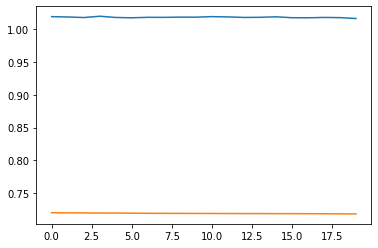

In [156]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

In [169]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  from sklearn.metrics import r2_score
 
  temp_preds = postprocess_temp(predictions)
  temp_actuals =postprocess_temp(y_test)
  r=r2_score(temp_actuals,temp_preds)
  print(r)
 # print(predictions.shape)
  #print(y.shape)
  df = pd.DataFrame(data={'SPI-1 Predictions': temp_preds,
                          'SPI-1 Actuals':temp_actuals,
                          })
  plt.plot(df['SPI-1 Predictions'][start:end])
  plt.plot(df['SPI-1 Actuals'][start:end])
  return df[start:end]

In [170]:

post_processed_df = plot_predictions2(model4, X_test, y_test)
post_processed_df



ValueError: ignored

In [ ]:
import math 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mae1=mae(x,y)
mse1=mse((df['Temperature Actuals'][start:end]),(df['Temperature Predictions'][start:end]))
rmse1=np.sqrt(mse1)
r2 = r2_score((df['Temperature Actuals'][start:end]),(df['Temperature Predictions'][start:end]))
print('Mean square error =', mse1)
print('Mean absolute error =', mae1)
print('Root mean square error=', rmse1)
print('r2 score =', r2)


KeyError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  print(predictions.shape)
  print(y.shape)
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(107,)
(107,)


(     Predictions   Actuals
 0       0.183951 -0.746416
 1      -0.058177  0.370000
 2       0.017963 -0.336389
 3      -0.226638 -0.489013
 4      -0.500716 -0.489013
 ..           ...       ...
 102    -0.930384  0.324249
 103     0.174775  0.545929
 104     0.836938  0.625802
 105     0.857685  0.185632
 106     0.534975  1.124725
 
 [107 rows x 2 columns], 0.9775790004578795)

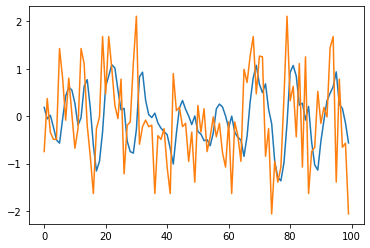

In [ ]:
plot_predictions1(model4, X_test, y_test)
